<a href="https://colab.research.google.com/github/ruperty/colab/blob/master/learning_cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Next step only for colab

In [1]:
# install of utilities to display openai environment in video
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install x11-utils  > /dev/null 2>&1


In [2]:
# install of my own pct library
!git clone https://github.com/ruperty/pct.git

Cloning into 'pct'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (295/295), done.
remote: Total 418 (delta 248), reused 280 (delta 113), pack-reused 0
Receiving objects: 100% (418/418), 86.94 KiB | 8.69 MiB/s, done.
Resolving deltas: 100% (248/248), done.


In [21]:
import plotly.graph_objects as go
import pct.openai.cpplots as cp
from pct.dl.models.cartpole import CartpoleTuning

In [4]:
import sys
#import matplotlib.animation as animation
from gym.wrappers import Monitor
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start() 

In [26]:
#offline_plot=True
training=True
render_gym=True
batch_size=10
num_runs=2000
learning_rate=0.0005

# initial weights/gains
#weights=[1.45,       0.4,       1.6,       -0.5]
weights=[4,       1.8,       1.5,       -0.05]

In [15]:
ct = CartpoleTuning( env_name="CartPole-v1", video_wrap=True)
env = ct.get_env()
obs = env.reset()
print("Initial inputs pole angle, pole velocity, cart position, cart velocity", obs)

Initial inputs pole angle, pole velocity, cart position, cart velocity [ 0.04606077  0.04658015 -0.01211203  0.02123826]


In [16]:
#plot = go.FigureWidget()
#plot.add_scatter(y=[]);
#plot.show()

In [27]:
ct.configure(weights=weights, opt_type="rmsprop", learning_rate=learning_rate, loss_type="rsuse",  loss_smooth=0.9, print=200, num_runs=num_runs)
ct.display_configure(live=False, render=render_gym)

In [28]:
out = ct.run( batch_size, training)        
#   ct.show()
#print(out)
        
#print("mean", ct.data.get_mean().numpy())
        


 200 loss 0.566      4.032      1.716      1.416      -0.050     
 400 loss 0.479      4.061      1.634      1.335      -0.050     
 600 loss 0.493      4.089      1.553      1.254      -0.050     
 800 loss 0.509      4.116      1.472      1.173      -0.050     
1000 loss 0.386      4.141      1.392      1.093      -0.050     
1200 loss 0.546      4.155      1.309      1.012      -0.050     
1400 loss 0.534      4.170      1.228      0.933      -0.050     
1600 loss 0.502      4.172      1.146      0.854      -0.050     
Cartpole failed with a poleangle of -13.23 degrees and global error of 2.48.
An optimised control system for this case would have residual error of around 0.20 or less


# New Section

In [30]:
import pct.openai.video  as vid
vid.show_video()

In [31]:
#import plotly.graph_objects as go
#edata=ct.get_error_data()  
#fig = go.Figure()
#fig.add_trace(go.Scatter(mode='lines',x=edata[0], y=edata[1], name="err"))
#fig.update_layout(title="Global Error", xaxis_title="Time", yaxis_title="Error")
#fig.show()

cp.scatter_plot(ct.get_error_data() , "Global Error", "Time", "Error")

In [23]:
ct.summary()

Model: "CartPole"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
reference_pa (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
perception_pa (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
error_pa (Subtract)             (None, 1)            0           reference_pa[0][0]               
                                                                 perception_pa[0][0]              
__________________________________________________________________________________________________
reference_pv (Dense)            (None, 1)            1           error_pa[0][0]            

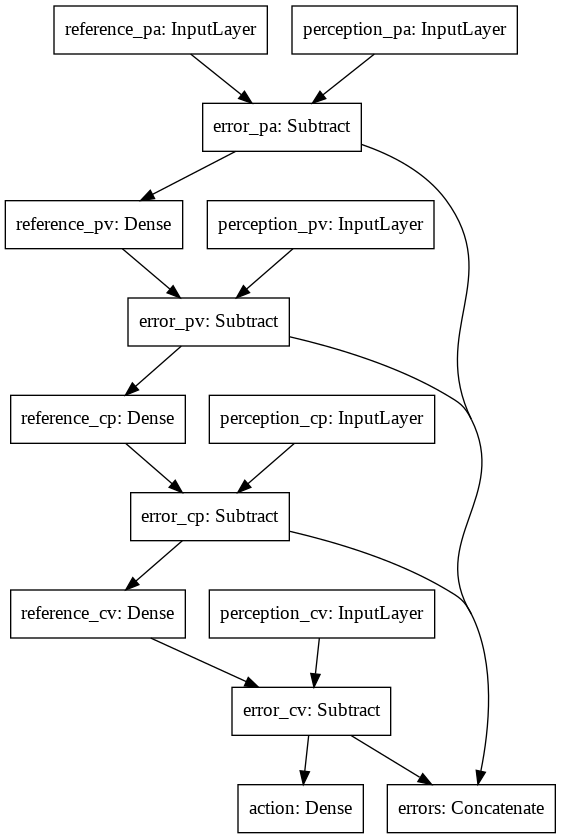

In [25]:
filename = "model.png"
ct.plot_model(filename)
from IPython.display import Image, display
Image(filename)

In [ ]:
ct.close()       

In [5]:

import pct.openai.cpplots as cp
cp.load_3d_landscape("pct/data/data-papv-[[-1.0][03.0]-[-0.2][01.0]]-cp-1.6.npy", 1)